## CIFAR 이미지 분류 모델 구현
---
 - 데이터: cifar10
 - 학습방법: 10가지 이미지 종류 분류 -> 다중분류
 - 이미지: DNN(MLP), CNN적용

In [45]:
from keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.datasets.cifar10 import load_data

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# W,b고정하도록 seed 설정
set_random_seed(11)

In [5]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## 데이터 전처리

In [8]:
# 스케일링 -> 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=11)

In [10]:
x_train.shape, x_val.shape

((37500, 32, 32, 3), (12500, 32, 32, 3))

## 모델 구성 및 생성

In [53]:
# 모델 구성
model=Sequential()

In [54]:
# 이미지 특징 추출 Layer -> 첫번째 입력값 설정
model.add(Conv2D(50, kernel_size=3, padding='same', input_shape=(32,32,3)))

# 이미지 특징 다운샘플링(다운사이즈) Layer -> MaxPool2D: 기본값(2,2) -> 가로세로 반으로 줌
model.add(MaxPool2D())


# model.add(Conv2D(250, kernel_size=3, padding='same', input_shape=(32,32,3)))
# model.add(MaxPool2D())



# 1차원으로 데이터 형태 변환 Layer -> Flatten
model.add(Flatten())

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))

# 출력층 -> Node: 10개(0~9), activation:softmax
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 50)        1400      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 50)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 12800)             0         
                                                                 
 dense_23 (Dense)            (None, 50)                640050    
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                      

In [55]:
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [56]:
# 모델 학습
model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1172/1172 [==============================] - 43s 36ms/step - loss: 1.8817 - accuracy: 0.3095 - val_loss: 1.5624 - val_accuracy: 0.4498
Epoch 2/30
1172/1172 [==============================] - 39s 33ms/step - loss: 1.6554 - accuracy: 0.3989 - val_loss: 1.5555 - val_accuracy: 0.4653
Epoch 3/30
1172/1172 [==============================] - 44s 37ms/step - loss: 1.5533 - accuracy: 0.4363 - val_loss: 1.4367 - val_accuracy: 0.4965
Epoch 4/30
1172/1172 [==============================] - 41s 35ms/step - loss: 1.4840 - accuracy: 0.4650 - val_loss: 1.3599 - val_accuracy: 0.5291
Epoch 5/30
1172/1172 [==============================] - 45s 38ms/step - loss: 1.4192 - accuracy: 0.4890 - val_loss: 1.3254 - val_accuracy: 0.5456
Epoch 6/30
1172/1172 [==============================] - 36s 31ms/step - loss: 1.3655 - accuracy: 0.5052 - val_loss: 1.2797 - val_accuracy: 0.5502
Epoch 7/30
1172/1172 [==============================] - 46s 39ms/step - loss: 1.3236 - accuracy: 0.5224 - val_loss: 1.2546 -

In [57]:
# 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.1707 - accuracy: 0.6010


[1.1706732511520386, 0.6010000109672546]

In [58]:
pre_y=model.predict(x_test[0].reshape(-1,32,32,3))

1/1 [==============================] - 0s 73ms/step


In [59]:
pre_y.round(2)

array([[0.12, 0.01, 0.16, 0.36, 0.04, 0.09, 0.02, 0.01, 0.17, 0.01]],
      dtype=float32)

In [60]:
y_test[0]

array([3], dtype=uint8)

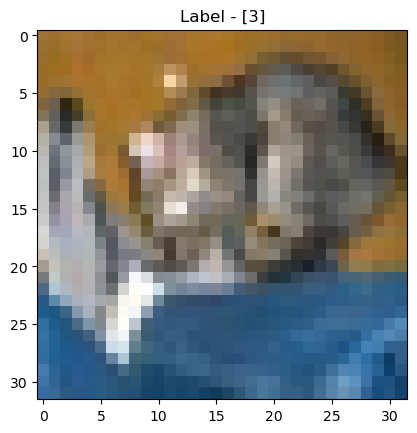

In [61]:
plt.imshow(x_test[0].reshape(32,32,3))
plt.title(f'Label - {y_test[0]}')
plt.show()